<a href="https://colab.research.google.com/github/kothapallypavithra/2095_DeepLearning/blob/main/2203A52095_DL_LAB7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'
Training MSE: 0.8787628512334559, RMSE: 0.9374235175380741, MAE: 0.794583283751525
Testing MSE: 1.056912776617997, RMSE: 1.028062632633828, MAE: 0.8771254338471823


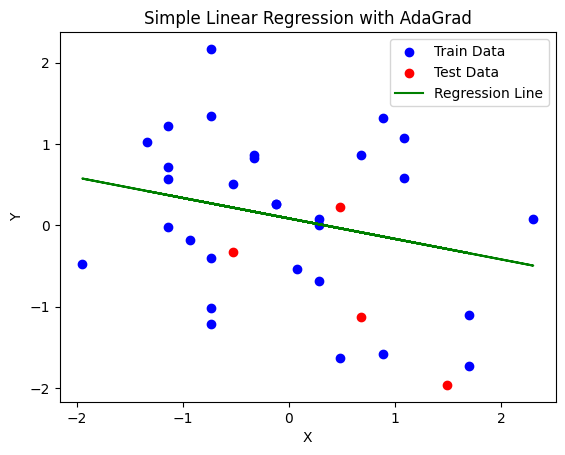

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load dataset manually
file_path = "/content/slr09.xls"  # Using the uploaded file
data = pd.read_excel(file_path, engine="xlrd")

# Inspect the first few rows
data.head()

# Assuming dataset has columns 'X' and 'Y'
X = data[['X']].values
y = data['Y'].values

# Normalize data
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = (y - np.mean(y)) / np.std(y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Initialize parameters
m, c = 1.0, -1.0
eta = 0.1  # Learning rate
epochs = 100
eps = 1e-8  # Smoothing term

gm_accum = 0  # Accumulator for m gradient
gc_accum = 0  # Accumulator for c gradient

# Training loop
for epoch in range(epochs):
    for i in range(len(X_train)):
        x_i, y_i = X_train[i], y_train[i]

        # Compute gradients
        gm = -2 * (y_i - (m * x_i + c)) * x_i
        gc = -2 * (y_i - (m * x_i + c))

        # Update accumulators
        gm_accum += gm**2
        gc_accum += gc**2

        # Adagrad update
        m -= (eta / (np.sqrt(gm_accum) + eps)) * gm
        c -= (eta / (np.sqrt(gc_accum) + eps)) * gc

# Predictions
train_preds = X_train * m + c
test_preds = X_test * m + c

# Compute error metrics
def compute_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    return mse, rmse, mae

train_mse, train_rmse, train_mae = compute_metrics(y_train, train_preds)
test_mse, test_rmse, test_mae = compute_metrics(y_test, test_preds)

print(f"Training MSE: {train_mse}, RMSE: {train_rmse}, MAE: {train_mae}")
print(f"Testing MSE: {test_mse}, RMSE: {test_rmse}, MAE: {test_mae}")

# Plot results
plt.scatter(X_train, y_train, label='Train Data', color='blue')
plt.scatter(X_test, y_test, label='Test Data', color='red')
plt.plot(X_train, train_preds, label='Regression Line', color='green')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Simple Linear Regression with AdaGrad')
plt.show()